<a href="https://colab.research.google.com/github/Tech-savvyPavithra/Data_Science-TasteCraft/blob/main/Internship_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load dataset from your drive
# Replace 'your_dataset_path.csv' with the actual path to your dataset
dataset_path = '/content/drive/MyDrive/Colab Notebooks/My Workouts/New_Yummy.csv'
data = pd.read_csv(dataset_path)
data

,Flavor Intensity,Texture Complexity,Spice Profile[0:Mild 1:Medium 2:Balanced 3:Spicy],Freshness Index,Culinary Technique Score,Aroma Richness[0:Low 1:High 2:Moderate 3:Very High],Tastiness
0,7,5,1,9,9,2,10.584
1,7,2,1,7,6,1,-4.317
2,10,4,1,7,7,1,-9.644
3,9,5,2,6,10,1,0.342
4,9,2,1,6,7,0,-11.602
...,...,...,...,...,...,...,...
9995,8,3,3,7,10,3,-0.616
9996,7,1,0,9,10,0,3.201
9997,8,4,1,9,10,0,6.657
9998,8,4,1,8,6,1,-1.846


In [ ]:
data.head()

,Flavor Intensity,Texture Complexity,Spice Profile[0:Mild 1:Medium 2:Balanced 3:Spicy],Freshness Index,Culinary Technique Score,Aroma Richness[0:Low 1:High 2:Moderate 3:Very High],Tastiness
0,7,5,1,9,9,2,10.584
1,7,2,1,7,6,1,-4.317
2,10,4,1,7,7,1,-9.644
3,9,5,2,6,10,1,0.342
4,9,2,1,6,7,0,-11.602


In [ ]:
data.tail()

,Flavor Intensity,Texture Complexity,Spice Profile[0:Mild 1:Medium 2:Balanced 3:Spicy],Freshness Index,Culinary Technique Score,Aroma Richness[0:Low 1:High 2:Moderate 3:Very High],Tastiness
9995,8,3,3,7,10,3,-0.616
9996,7,1,0,9,10,0,3.201
9997,8,4,1,9,10,0,6.657
9998,8,4,1,8,6,1,-1.846
9999,8,5,3,10,10,2,9.155


In [ ]:
data.shape

(10000, 7)

In [ ]:
data.size

70000

In [ ]:
data.describe()

,Flavor Intensity,Texture Complexity,Spice Profile[0:Mild 1:Medium 2:Balanced 3:Spicy],Freshness Index,Culinary Technique Score,Aroma Richness[0:Low 1:High 2:Moderate 3:Very High],Tastiness
count,10000.000000,10000.000000,10000.00000,10000.0000,10000.000000,10000.000000,10000.000000
mean,8.002800,2.995700,1.50110,8.0023,8.014300,1.484900,-1.455023
std,1.414635,1.411127,1.11612,1.4073,1.409005,1.112338,7.407056
min,6.000000,1.000000,0.00000,6.0000,6.000000,0.000000,-21.820000
25%,7.000000,2.000000,1.00000,7.0000,7.000000,0.000000,-6.808500
50%,8.000000,3.000000,2.00000,8.0000,8.000000,1.000000,-1.455000
75%,9.000000,4.000000,2.00000,9.0000,9.000000,2.000000,3.874500
max,10.000000,5.000000,3.00000,10.0000,10.000000,3.000000,18.468000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Flavor Intensity                                     10000 non-null  int64  
 1   Texture Complexity                                   10000 non-null  int64  
 2   Spice Profile[0:Mild 1:Medium 2:Balanced 3:Spicy]    10000 non-null  int64  
 3   Freshness Index                                      10000 non-null  int64  
 4   Culinary Technique Score                             10000 non-null  int64  
 5   Aroma Richness[0:Low 1:High 2:Moderate 3:Very High]  10000 non-null  int64  
 6   Tastiness                                            10000 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 547.0 KB


In [ ]:
data.isnull()

,Flavor Intensity,Texture Complexity,Spice Profile[0:Mild 1:Medium 2:Balanced 3:Spicy],Freshness Index,Culinary Technique Score,Aroma Richness[0:Low 1:High 2:Moderate 3:Very High],Tastiness
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

Flavor Intensity                                       0
Texture Complexity                                     0
Spice Profile[0:Mild 1:Medium 2:Balanced 3:Spicy]      0
Freshness Index                                        0
Culinary Technique Score                               0
Aroma Richness[0:Low 1:High 2:Moderate 3:Very High]    0
Tastiness                                              0
dtype: int64

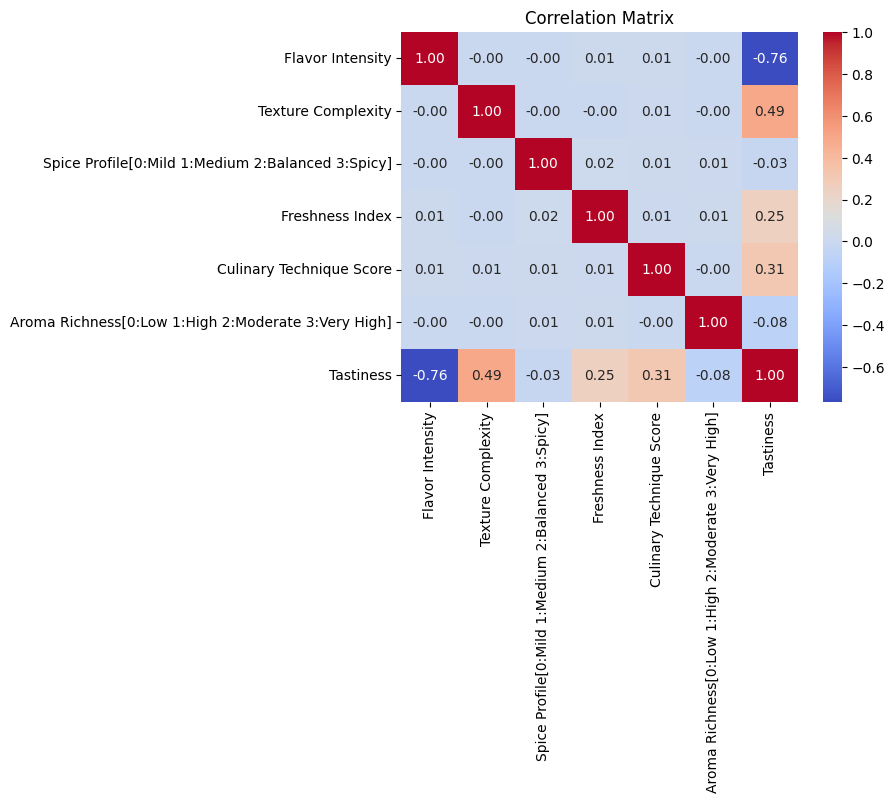

In [ ]:
import seaborn as sns

# Calculate and display the correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

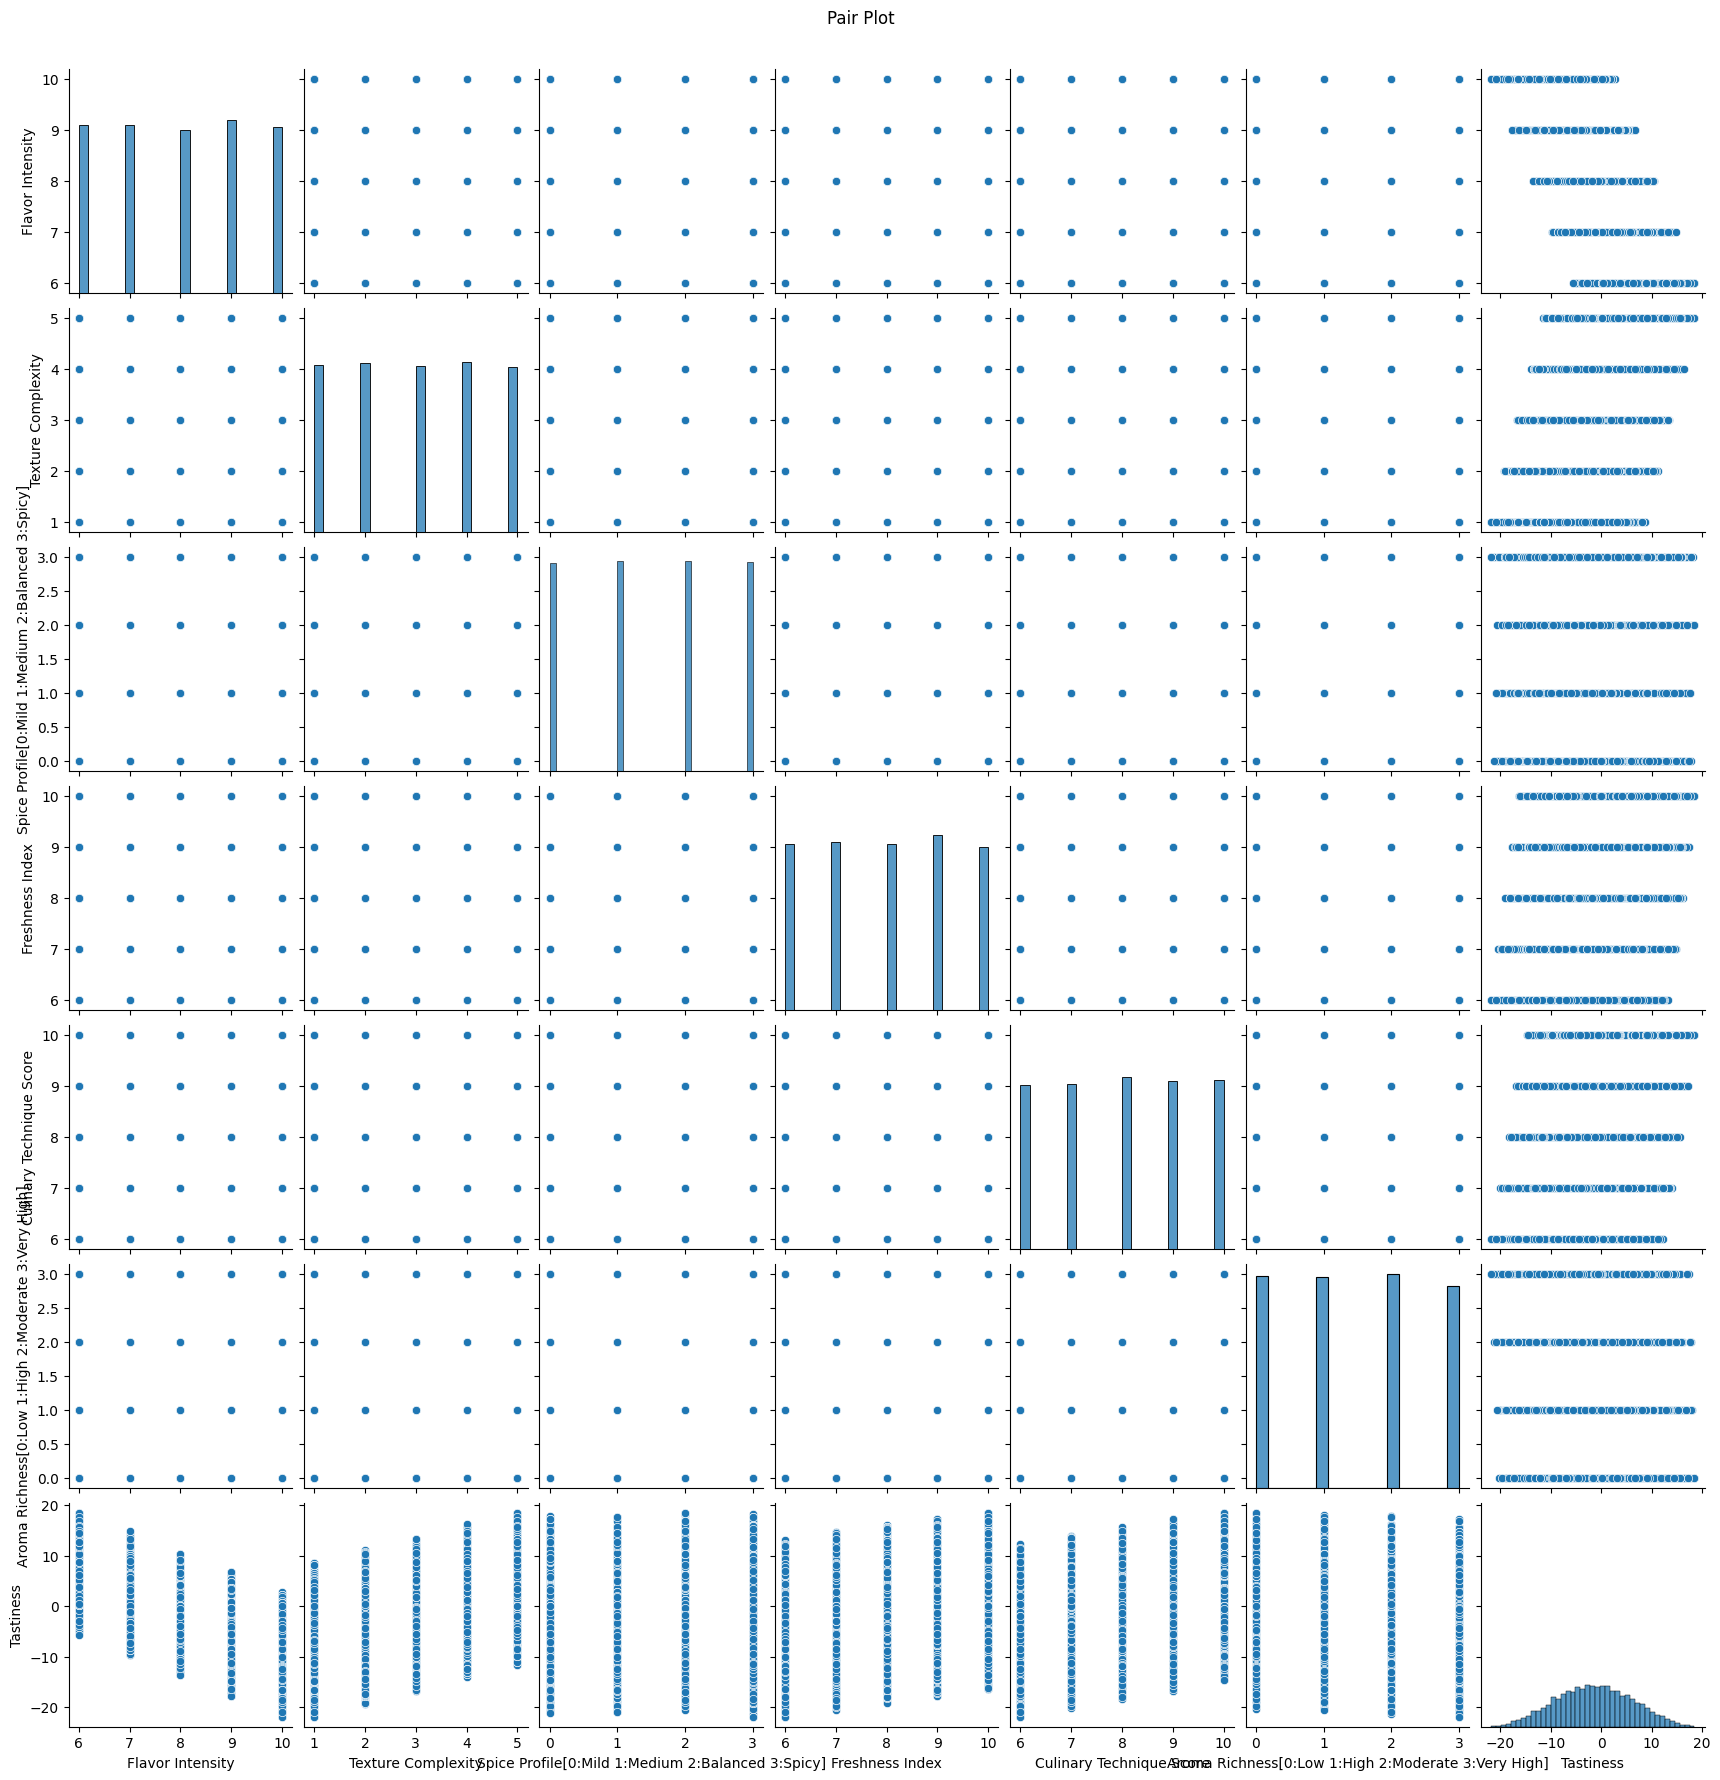

In [ ]:
# Create a pair plot to visualize relationships between variables
sns.pairplot(data)
plt.suptitle('Pair Plot', y=1.02)
plt.show()

In [ ]:
# Assuming your dataset has features X and target variable y
X = data.drop('Tastiness', axis=1)
y = data['Tastiness']

In [ ]:
X

,Flavor Intensity,Texture Complexity,Spice Profile[0:Mild 1:Medium 2:Balanced 3:Spicy],Freshness Index,Culinary Technique Score,Aroma Richness[0:Low 1:High 2:Moderate 3:Very High]
0,7,5,1,9,9,2
1,7,2,1,7,6,1
2,10,4,1,7,7,1
3,9,5,2,6,10,1
4,9,2,1,6,7,0
...,...,...,...,...,...,...
9995,8,3,3,7,10,3
9996,7,1,0,9,10,0
9997,8,4,1,9,10,0
9998,8,4,1,8,6,1


In [ ]:
y

0       10.584
1       -4.317
2       -9.644
3        0.342
4      -11.602
         ...  
9995    -0.616
9996     3.201
9997     6.657
9998    -1.846
9999     9.155
Name: Tastiness, Length: 10000, dtype: float64

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the Support Vector Machine model
svm_regressor = SVR(kernel='linear')  # You can choose other kernels as well
svm_regressor.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
# Make predictions on the test set
y_pred = svm_regressor.predict(X_test)

In [ ]:
y_pred

array([10.6643618 ,  5.70264938, -3.13694659, ..., -1.01675094,
       -4.90388182, -6.03812833])

In [ ]:
import statsmodels.api as sm

# Assuming X and y are your feature matrix and target variable
X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Tastiness   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.697e+31
Date:                Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                        03:07:06   Log-Likelihood:             2.9430e+05
No. Observations:               10000   AIC:                        -5.886e+05
Df Residuals:                    9993   BIC:                        -5.885e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
# Display performance metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Squared Error: 0.01
R-squared: 1.00
Mean Absolute Error: 0.06
Root Mean Squared Error: 0.07


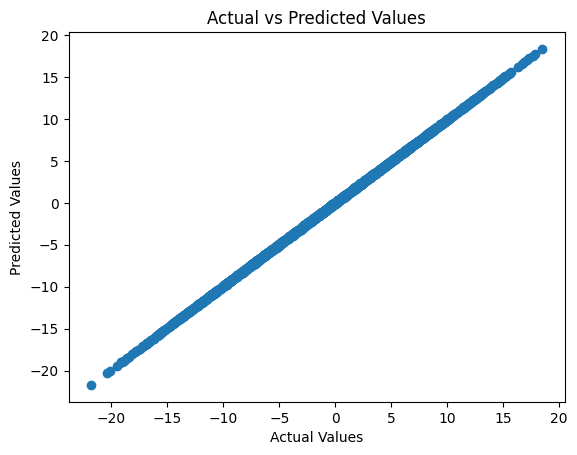

In [ ]:
# Plotting the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

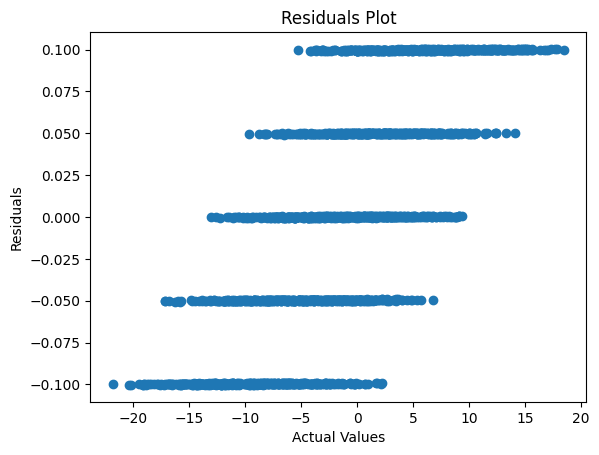

In [ ]:
# Plotting the residuals
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

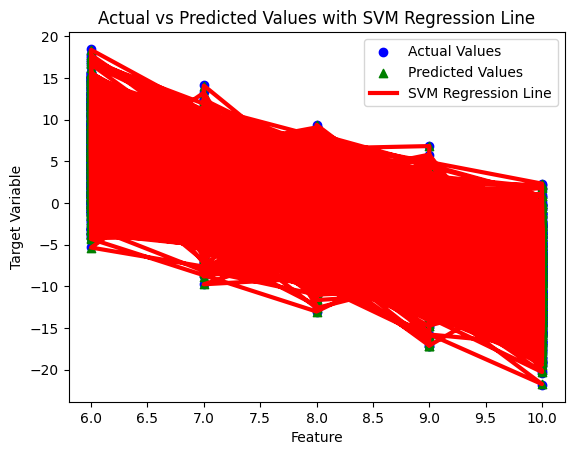

In [ ]:
# Select a single feature for visualization
feature_for_scatter = 'Flavor Intensity'  # Replace 'your_chosen_feature' with the desired feature

# Scatter plot with regression line
plt.scatter(X_test[feature_for_scatter], y_test, color='blue', label='Actual Values')
plt.scatter(X_test[feature_for_scatter], y_pred, color='green', label='Predicted Values', marker='^')
plt.plot(X_test[feature_for_scatter], y_pred, color='red', linewidth=3, label='SVM Regression Line')
plt.xlabel('Feature')
plt.ylabel('Target Variable')
plt.title('Actual vs Predicted Values with SVM Regression Line')
plt.legend()
plt.show()

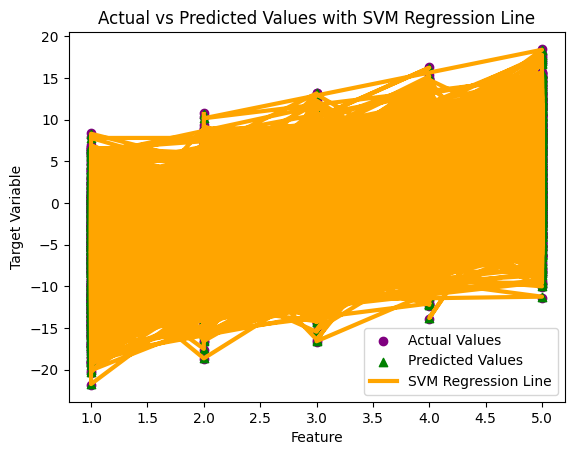

In [ ]:
# Select a single feature for visualization
feature_for_scatter = 'Texture Complexity'  # Replace 'your_chosen_feature' with the desired feature

# Scatter plot with regression line
plt.scatter(X_test[feature_for_scatter], y_test, color='purple', label='Actual Values')
plt.scatter(X_test[feature_for_scatter], y_pred, color='green', label='Predicted Values', marker='^')
plt.plot(X_test[feature_for_scatter], y_pred, color='orange', linewidth=3, label='SVM Regression Line')
plt.xlabel('Feature')
plt.ylabel('Target Variable')
plt.title('Actual vs Predicted Values with SVM Regression Line')
plt.legend()
plt.show()

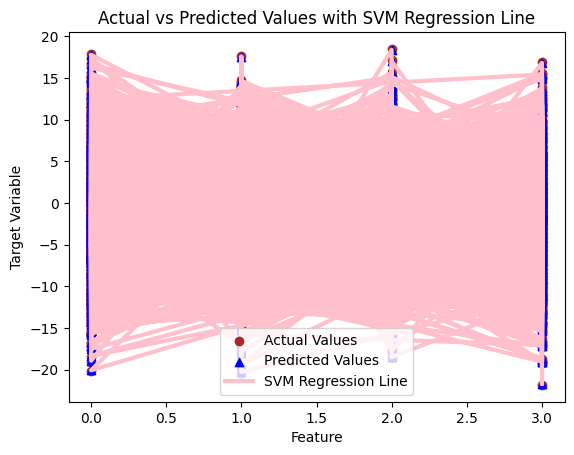

In [ ]:
# Select a single feature for visualization
feature_for_scatter = 'Spice Profile[0:Mild 1:Medium 2:Balanced 3:Spicy]'  # Replace 'your_chosen_feature' with the desired feature

# Scatter plot with regression line
plt.scatter(X_test[feature_for_scatter], y_test, color='brown', label='Actual Values')
plt.scatter(X_test[feature_for_scatter], y_pred, color='blue', label='Predicted Values', marker='^')
plt.plot(X_test[feature_for_scatter], y_pred, color='pink', linewidth=3, label='SVM Regression Line')
plt.xlabel('Feature')
plt.ylabel('Target Variable')
plt.title('Actual vs Predicted Values with SVM Regression Line')
plt.legend()
plt.show()

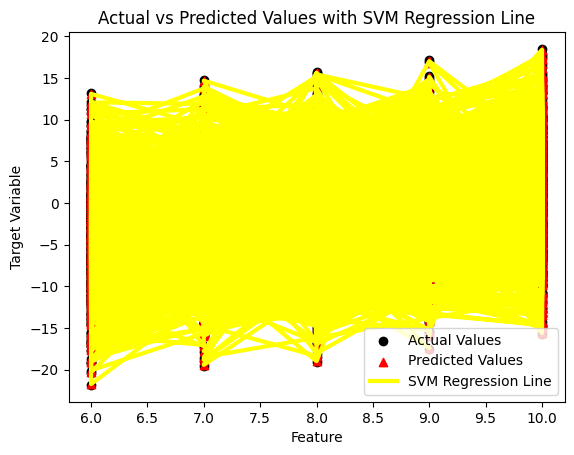

In [ ]:
# Select a single feature for visualization
feature_for_scatter = 'Freshness Index'  # Replace 'your_chosen_feature' with the desired feature

# Scatter plot with regression line
plt.scatter(X_test[feature_for_scatter], y_test, color='black', label='Actual Values')
plt.scatter(X_test[feature_for_scatter], y_pred, color='red', label='Predicted Values', marker='^')
plt.plot(X_test[feature_for_scatter], y_pred, color='yellow', linewidth=3, label='SVM Regression Line')
plt.xlabel('Feature')
plt.ylabel('Target Variable')
plt.title('Actual vs Predicted Values with SVM Regression Line')
plt.legend()
plt.show()

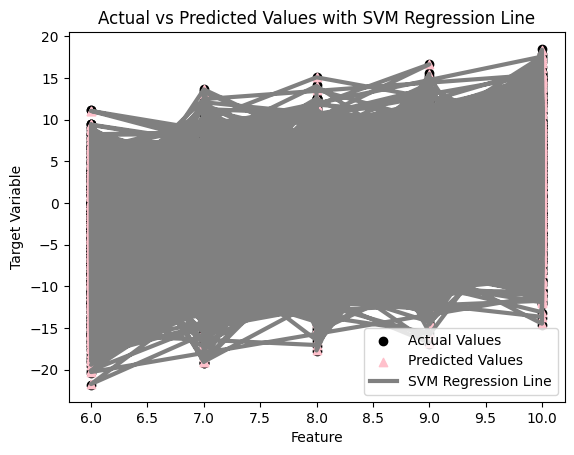

In [ ]:
# Select a single feature for visualization
feature_for_scatter = 'Culinary Technique Score'  # Replace 'your_chosen_feature' with the desired feature

# Scatter plot with regression line
plt.scatter(X_test[feature_for_scatter], y_test, color='black', label='Actual Values')
plt.scatter(X_test[feature_for_scatter], y_pred, color='pink', label='Predicted Values', marker='^')
plt.plot(X_test[feature_for_scatter], y_pred, color='grey', linewidth=3, label='SVM Regression Line')
plt.xlabel('Feature')
plt.ylabel('Target Variable')
plt.title('Actual vs Predicted Values with SVM Regression Line')
plt.legend()
plt.show()

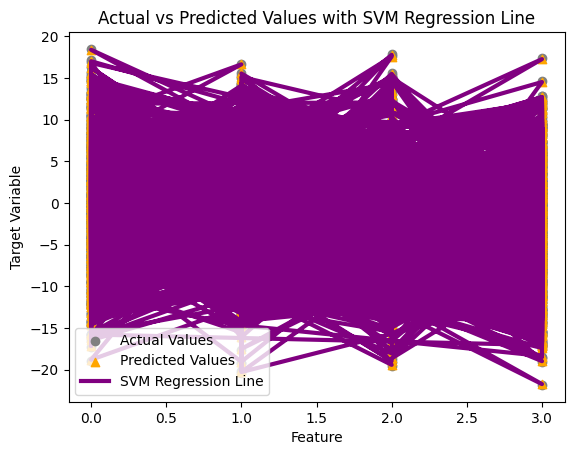

In [ ]:
# Select a single feature for visualization
feature_for_scatter = 'Aroma Richness[0:Low 1:High 2:Moderate 3:Very High]'  # Replace 'your_chosen_feature' with the desired feature

# Scatter plot with regression line
plt.scatter(X_test[feature_for_scatter], y_test, color='grey', label='Actual Values')
plt.scatter(X_test[feature_for_scatter], y_pred, color='orange', label='Predicted Values', marker='^')
plt.plot(X_test[feature_for_scatter], y_pred, color='purple', linewidth=3, label='SVM Regression Line')
plt.xlabel('Feature')
plt.ylabel('Target Variable')
plt.title('Actual vs Predicted Values with SVM Regression Line')
plt.legend()
plt.show()

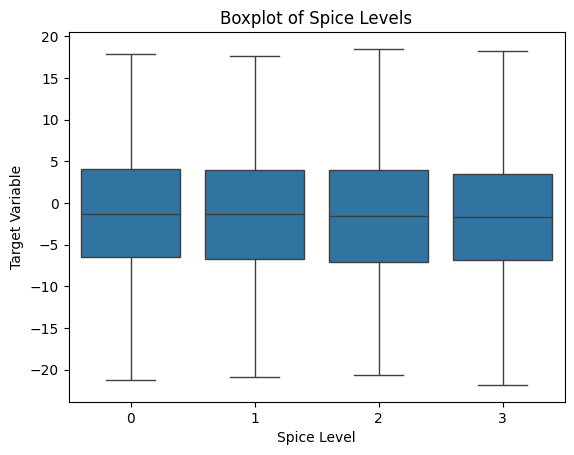

In [ ]:
import seaborn as sns

# Assuming 'spice_column' is the name of the column in your dataset
spice_column = 'Spice Profile[0:Mild 1:Medium 2:Balanced 3:Spicy]'

# Create a boxplot for spice levels
sns.boxplot(x=spice_column, y='Tastiness', data=data)
plt.xlabel('Spice Level')
plt.ylabel('Target Variable')
plt.title('Boxplot of Spice Levels')
plt.show()

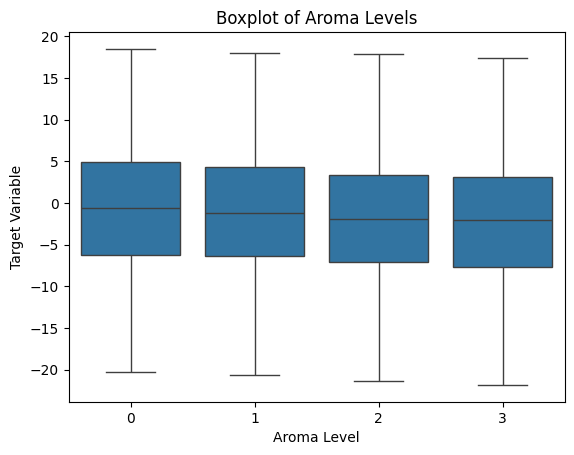

In [ ]:
import seaborn as sns

# Assuming 'aroma_column' is the name of the column in your dataset
aroma_column = 'Aroma Richness[0:Low 1:High 2:Moderate 3:Very High]'

# Create a boxplot for spice levels
sns.boxplot(x=aroma_column, y='Tastiness', data=data)
plt.xlabel('Aroma Level')
plt.ylabel('Target Variable')
plt.title('Boxplot of Aroma Levels')
plt.show()

In [ ]:
# Accessing coefficients
coefficients = svm_model.coef_
coefficients

array([[-3.98914776,  2.56794771, -0.20900945,  1.37395434,  1.65390414,
        -0.51319499]])